### Import Librares

In [1]:
import numpy as np
import pandas as pd

### loading Dataset of Brainstroke 

In [2]:
data=pd.read_csv(r"C:\Users\sujat\Downloads\DataSets\Brain Stroke.csv")
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


### Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
data["gender"]=l1.fit_transform(data["gender"])
data["work_type"]=l1.fit_transform(data["work_type"])
data["ever_married"]=l1.fit_transform(data["ever_married"])
data["Residence_type"]=l1.fit_transform(data["Residence_type"])
data["smoking_status"]=l1.fit_transform(data["smoking_status"])

In [6]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


### Cheack the Outlier

Text(0.5, 1.0, 'Outlier Detection based on age')

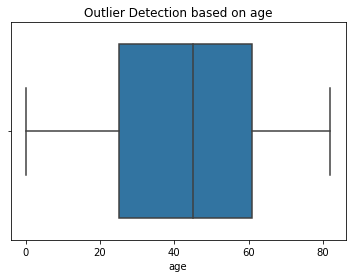

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['age'])
plt.title('Outlier Detection based on age')

Text(0.5, 1.0, 'Outlier Detection based on bmi')

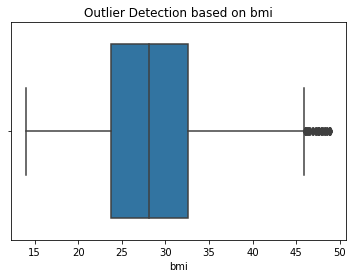

In [8]:
sns.boxplot(x=data['bmi'])
plt.title('Outlier Detection based on bmi')

In [9]:
data["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [10]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

### What is Standardization ?
#### Standardization is the process of developing, promoting and possibly mandating standards-based and
#### compatible technologies and processes within a given industry

In [11]:
from sklearn.preprocessing import StandardScaler
s1=StandardScaler()
s2=s1.fit_transform(x)
s2

array([[ 1.18390850e+00,  1.04058433e+00, -3.26185770e-01, ...,
         2.72341090e+00,  1.19323816e+00, -3.53933192e-01],
       [ 1.18390850e+00,  1.61427033e+00, -3.26185770e-01, ...,
        -5.22766599e-04,  5.89389611e-01,  5.78839946e-01],
       [-8.44659868e-01,  2.46249882e-01, -3.26185770e-01, ...,
         1.44852918e+00,  8.69221866e-01,  1.51161308e+00],
       ...,
       [-8.44659868e-01,  6.97311148e-02,  3.06573766e+00, ...,
        -2.42364234e-01,  4.86293516e-01,  1.51161308e+00],
       [ 1.18390850e+00, -1.50917344e-01, -3.26185770e-01, ...,
        -4.88199415e-01,  2.21189274e-01,  1.51161308e+00],
       [-8.44659868e-01,  1.61427033e+00,  3.06573766e+00, ...,
        -4.92415000e-01,  8.86371531e-02,  5.78839946e-01]])

In [12]:
data1=pd.DataFrame(s2)
data1

,0,1,2,3,4,5,6,7,8,9
0,1.183909,1.040584,-0.326186,4.136753,0.720137,-0.351534,0.983473,2.723411,1.193238,-0.353933
1,1.183909,1.614270,-0.326186,4.136753,0.720137,-0.351534,-1.016804,-0.000523,0.589390,0.578840
2,-0.844660,0.246250,-0.326186,-0.241735,0.720137,-0.351534,0.983473,1.448529,0.869222,1.511613
3,-0.844660,1.570141,3.065738,-0.241735,0.720137,0.811143,-1.016804,1.512650,-0.662492,0.578840
4,1.183909,1.658400,-0.326186,-0.241735,0.720137,-0.351534,0.983473,1.780895,0.073909,-0.353933
...,...,...,...,...,...,...,...,...,...,...
4976,1.183909,-0.106788,-0.326186,-0.241735,-1.388624,-0.351534,-1.016804,-0.794162,0.191733,-0.353933
4977,1.183909,-0.150917,-0.326186,-0.241735,0.720137,-0.351534,0.983473,1.890500,0.383197,1.511613
4978,-0.844660,0.069731,3.065738,-0.241735,0.720137,-1.514212,-1.016804,-0.242364,0.486294,1.511613
4979,1.183909,-0.150917,-0.326186,-0.241735,0.720137,-0.351534,-1.016804,-0.488199,0.221189,1.511613


In [13]:
x1=x
y1=y

### Using SMOTE for balancing the data

In [14]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_data,y_data=sm.fit_resample(x1,y1)

In [15]:
from collections import Counter
print(Counter(y_data))

Counter({1: 4733, 0: 4733})


### Spliting the data into train_test_split

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=0)

### Explain Logistic Regression.
#### Logistic regression is one of the most popular Machine Learning algorithms, which comes under the
#### Supervised Learning technique.
#### In logistic Regression the dependent variable is dichotomous i.e. binary.
#### It is used for predicting the categorical dependent variable using a given set of independent variables.
#### It is used for solving the classification problem.
#### It is used to describe data and the relationship between the dependent and one or more independent
#### variables.

In [17]:
from sklearn.linear_model import LogisticRegression
L1=LogisticRegression()
L1.fit(x_train,y_train)

C:\Users\sujat\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred=L1.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)*100
print(acc)

77.40232312565998


### What is Cross Validation and its Types ?
#### Cross-validation is a technique for validating the model efficiency by training it on the subset of input data
#### and testing on previously unseen subset of the input data.
#### We can also say that it is a technique to check how a statistical model generalizes to an independent
#### dataset.
#### Types of Cross Validation :
#### 1) Leave-one-out cross validation
#### 2) K fold cross validation
#### 3) Stratified K Fold Cross Validation

In [20]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=10,shuffle=True)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
score=cross_val_score(L1,x_train,y_train,cv=kf)*100
pred=cross_val_predict(L1,x_test,y_test)
print(np.mean(score))
print(pred)

C:\Users\sujat\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sujat\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

77.56235095107925
[1 1 0 ... 0 0 0]


C:\Users\sujat\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sujat\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

###  What is KNN and Explanation.
#### K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning
#### technique.
#### K-NN algorithm assumes the similarity between the new case/data and available cases and put the new
#### case into the category that is most similar to the available categories.
#### K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the
#### Classification problems.
#### K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
#### It is also called a lazy learner algorithm because it does not learn from the training set immediately instead
#### it stores the dataset and at the time of classification, it performs an action on the dataset.


In [22]:
from sklearn.neighbors import KNeighborsClassifier
k1=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
k1.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
y_predk=k1.predict(x_test)
print(y_pred)

[1 1 0 ... 0 0 0]


In [24]:
acck=accuracy_score(y_predk,y_test)*100
print(acck)

89.28194297782471


### Cross-validation

In [25]:
scorek=cross_val_score(k1,x_train,y_train,cv=kf)*100
predk=cross_val_predict(k1,x_test,y_test)
print(np.mean(scorek))
print(predk)

88.40475038256798
[0 1 0 ... 0 0 0]


### What is support vector machine?
#### Support vector machine(svm) is a supervised classification algorithm.
#### Which is used for classification as well as regression problems but mainly used for classifiction problems in
#### machine learning.
#### The goal of the SVM algorithm is to create the best line or decision boundary that can segregate ndimensional space into classes so that we can easily put the new data point in the correct category in the
#### future. This best decision boundary is called a hyperplane.


In [26]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [27]:
y_preds=sv.predict(x_test)
y_preds

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
accs=accuracy_score(y_preds,y_test)*100
print(accs)

76.66314677930306


### Cross-validation

In [29]:
scores=cross_val_score(sv,x_train,y_train,cv=kf)*100
preds=cross_val_predict(sv,x_test,y_test)
print(np.mean(scores))
print(predk)

76.58510448138605
[0 1 0 ... 0 0 0]


### What is a naive bayes algorithm?
#### Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for
#### solving classification problems.
#### It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
#### examples -
#### spam filtration
#### Sentimental analysis
#### classifying articles

In [30]:
from sklearn.naive_bayes import GaussianNB
g1=GaussianNB()
g1.fit(x_train,y_train)

GaussianNB()

In [31]:
y_predg=g1.predict(x_test)
y_predg

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
accg=accuracy_score(y_predg,y_test)*100
print(accg)

78.4582893347413


### Cross-validation

In [33]:
scoreg=cross_val_score(g1,x_train,y_train,cv=kf)*100
predg=cross_val_predict(g1,x_test,y_test)
print(np.mean(scoreg))
print(predg)

78.44696147289763
[1 1 0 ... 0 0 0]


###  What is Random Forest model ?
#### Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique.
#### It can be used for both Classification and Regression problems in ML.
#### It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to
#### solve a complex problem and to improve the performance of the model.
#### It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

In [34]:
from sklearn.ensemble import RandomForestClassifier
R1=RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=5,random_state=11)
R1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=11)

In [35]:
y_predR=R1.predict(x_test)
y_predR

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
accR=accuracy_score(y_test,y_predR)*100
print(accR)

89.86272439281943


### Cross-validation

In [37]:
scoreR=cross_val_score(R1,x_train,y_train,cv=kf)*100
predR=cross_val_predict(R1,x_test,y_test)
print(np.mean(scoreR))
print(predR)

88.74822885194729
[1 1 0 ... 0 0 0]


### What is decision tree?
#### Decision Tree is classification supervised machine learning algorithm.
#### The gole is to create model that predicts the value of target variable by learning simple decision rule from
#### data feacture.
#### It learn from the conditional concepts like decision rule.
#### Every decision rules has some conditions.
#### The dipper the tree more complex the decision rule and fitter the model.

In [38]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_predD=dt.predict(x_test)
y_predD

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
accD=accuracy_score(y_predD,y_test)*100
print(accD)

94.56177402323127


#### cross-validation technique

In [41]:
scoreD=cross_val_score(dt,x_train,y_train,cv=kf)*100
predD=cross_val_predict(dt,x_test,y_test)
print(np.mean(scoreD))
print(predD)

94.03076238931688
[1 1 0 ... 0 0 0]


###  What is Ensemble Techniques ?
#### Ensemble methods are techniques that create multiple models and then combine them to produce
#### improved results. Ensemble methods usually produces more accurate solutions than a single model would.


#### VotingClassifier
#### A voting classifier is a machine learning estimator that trains various base models or estimators and
##### predicts on the basis of aggregating the findings of each base estimator.

In [42]:
from sklearn.ensemble import VotingClassifier
max_vote=VotingClassifier(estimators=[("Logistic",L1),("knn",k1),("svm",sv),("Random forest",R1),("navie Bayes",g1),("DesicionTree",dt)])
max_vote.fit(x_train,y_train)

C:\Users\sujat\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('knn', KNeighborsClassifier()), ('svm', SVC()),
                             ('Random forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     n_estimators=10,
                                                     random_state=11)),
                             ('navie Bayes', GaussianNB()),
                             ('DesicionTree', DecisionTreeClassifier())])

In [43]:
y_max_vote=max_vote.predict(x_test)
print(y_max_vote)

[1 1 0 ... 0 0 0]


In [44]:
accuracy =accuracy_score(y_max_vote,y_test)*100
print(accuracy)

86.06124604012672


###  RocCurveDisplay

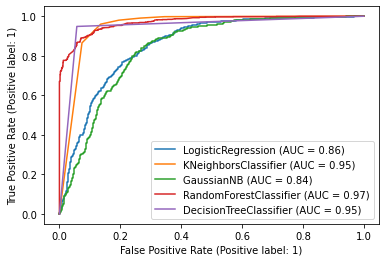

In [45]:
from sklearn.metrics import RocCurveDisplay
ax=plt.gca()
l1Display=RocCurveDisplay.from_estimator(L1,x_test,y_test,ax=ax)
k1Display=RocCurveDisplay.from_estimator(k1,x_test,y_test,ax=ax)
g1Display=RocCurveDisplay.from_estimator(g1,x_test,y_test,ax=ax)
r1Display=RocCurveDisplay.from_estimator(R1,x_test,y_test,ax=ax)
dtDisplay=RocCurveDisplay.from_estimator(dt,x_test,y_test,ax=ax)
plt.show()

### What is classification report?
##### A classification report is a performance evaluation metric in machine learning.
##### It is used to show the precision, recall, F1 Score, and support of your trained classification model.

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test, target_names=['Not stroke','stroke']))

              precision    recall  f1-score   support

  Not stroke       0.75      0.79      0.77       896
      stroke       0.80      0.76      0.78       998

    accuracy                           0.77      1894
   macro avg       0.77      0.77      0.77      1894
weighted avg       0.78      0.77      0.77      1894

